In [1]:
from RoutePlanner.CellGrid import CellGrid
from RoutePlanner.IO import LoadIcePoints, LoadCurrentPoints
from RoutePlanner import Plot
from RoutePlanner.Optimisation import TravelTime

import numpy as np
import pandas as pd

In [2]:
X     = [320,340]
Y     = [-75,-60]
d     = [5,2.5]

WP = pd.DataFrame({'Name':['WP1','WP2'],\
                   'Lat':np.random.uniform(low=Y[0], high=Y[1],size=2),\
                   'Long':np.random.uniform(low=X[0], high=X[1],size=2)})


icePoints     = LoadIcePoints('../../Data/bsose_i122_2013to2017_1day_SeaIceArea.nc','2017-03-15','2017-03-16')
currentPoints = LoadCurrentPoints('../../Data/SOSE_surface_velocity_6yearMean_2005-2010.nc')
cellGrid = CellGrid(X[0],X[1],Y[0],Y[1],d[0],d[1])
cellGrid.addIcePoints(icePoints)
cellGrid.addCurrentPoints(currentPoints)
cellGrid.recursiveSplit(1)



                                                Cell  idx  Case  \
0  Lat Range: -68.75 to -67.5, Long Range: 327.5 ...   14    -1   
1  Lat Range: -67.5 to -65.0, Long Range: 325 to ...   15    -2   
2  Lat Range: -65.0 to -62.5, Long Range: 325 to ...   16    -3   
3  Lat Range: -68.75 to -67.5, Long Range: 330 to...   28     4   
4  Lat Range: -68.75 to -67.5, Long Range: 332.5 ...   29     4   
5  Lat Range: -65.0 to -62.5, Long Range: 330 to ...   31    -4   
6  Lat Range: -70.0 to -67.5, Long Range: 335 to ...   41     3   
7  Lat Range: -67.5 to -65.0, Long Range: 335 to ...   42     2   
8  Lat Range: -65.0 to -62.5, Long Range: 335 to ...   43     1   

                           Cp  
0              (330.0, -67.5)  
1             (330.0, -66.25)  
2              (330.0, -65.0)  
3  (331.6666666666667, -67.5)  
4  (333.3333333333333, -67.5)  
5              (332.5, -65.0)  
6              (335.0, -67.5)  
7             (335.0, -66.25)  
8              (335.0, -65.0)  


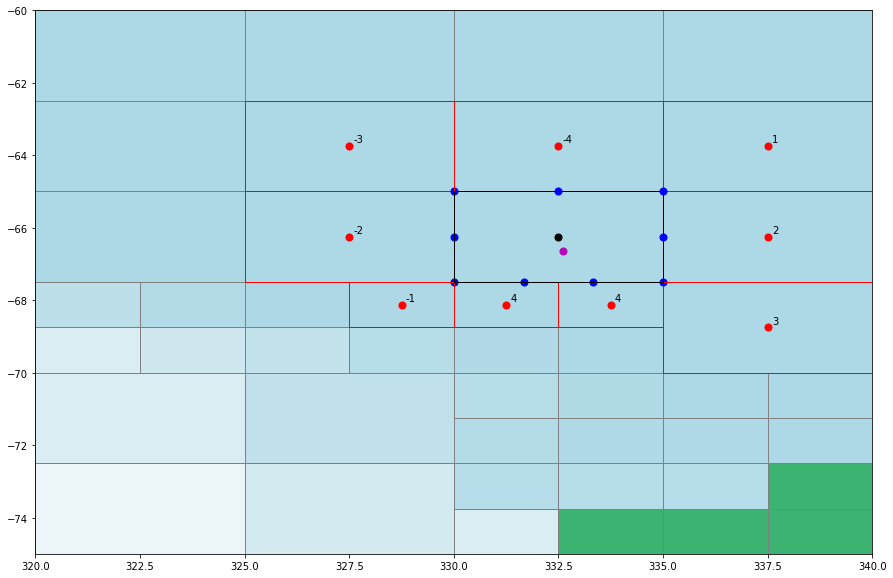

In [3]:
Plot.MeshNeighbours(cellGrid,np.random.uniform(low=X[0], high=X[1],size=1),np.random.uniform(low=Y[0], high=Y[1],size=1))

=== Processing Waypoint = WP1 ===
                                                Cell  idx  Case  \
0  Lat Range: -67.5 to -65.0, Long Range: 320 to ...    6     4   
1  Lat Range: -62.5 to -60.0, Long Range: 320 to ...    8    -4   
2  Lat Range: -67.5 to -65.0, Long Range: 325 to ...   15     3   
3  Lat Range: -65.0 to -62.5, Long Range: 325 to ...   16     2   
4  Lat Range: -62.5 to -60.0, Long Range: 325 to ...   17     1   

                Cp  
0   (322.5, -65.0)  
1   (322.5, -62.5)  
2   (325.0, -65.0)  
3  (325.0, -63.75)  
4   (325.0, -62.5)  
(5, 2)
                                                Cell  idx  Case  \
0  Lat Range: -67.5 to -65.0, Long Range: 320 to ...    6    -1   
1  Lat Range: -65.0 to -62.5, Long Range: 320 to ...    7    -2   
2  Lat Range: -62.5 to -60.0, Long Range: 320 to ...    8    -3   
3  Lat Range: -67.5 to -65.0, Long Range: 325 to ...   15     4   
4  Lat Range: -62.5 to -60.0, Long Range: 325 to ...   17    -4   
5  Lat Range: -67.5 to -65.0

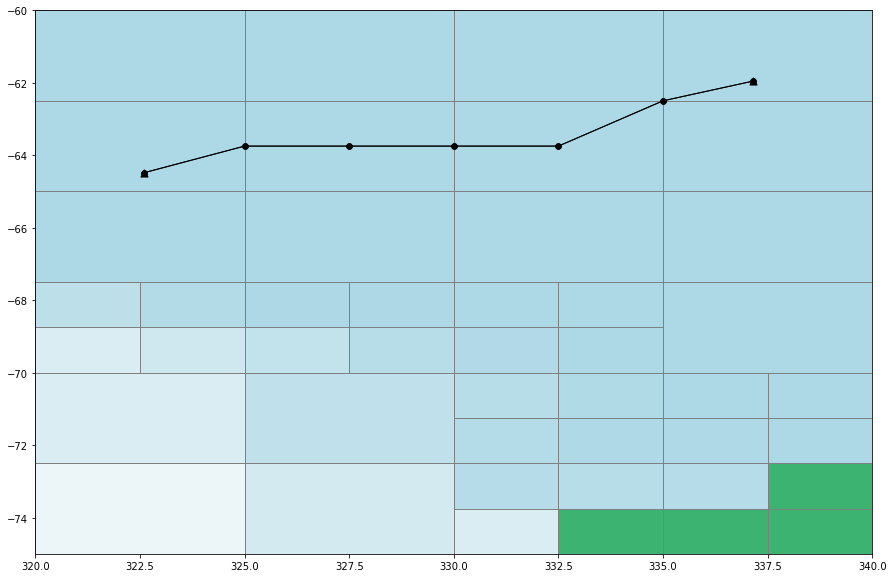

In [4]:

OptInfo = {}
OptInfo['WayPoints']            = WP
OptInfo['MaxIceExtent']         = 0.8
OptInfo['Zero Currents']        = True
OptInfo['VariableSpeed']        = False
OptInfo['Time Unit']            = 'days'

OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3
OptInfo['VehicleInfo']['Unit']  = 'km/hr'

TT = TravelTime(cellGrid,OptInfo)
Paths = TT.Paths(verbrose=True)
Plot.Paths(cellGrid,Paths,routepoints=True,Waypoints=WP)

In [6]:
Paths[0]

{'from': 'WP1',
 'to': 'WP2',
 'Time': 1.414711757399074,
 'Path': {'Points': array([[322.59647384, -64.48517195],
         [325.        , -63.75      ],
         [327.5       , -63.75      ],
         [330.        , -63.75      ],
         [332.5       , -63.75      ],
         [335.        , -62.5       ],
         [337.15547732, -61.95527284]]),
  'Time': [0.0,
   0.20358966006787546,
   0.20358966006787546,
   0.6107689802036264,
   0.6107689802036264,
   1.1145351988352878,
   1.1145351988352878]}}